# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
Ημερομηνία εκφώνησης άσκησης: 3/12/18
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 



In [1]:
!pip3 install --upgrade --user pip
!pip3 install --upgrade --user numpy
!pip3 install --upgrade --user pandas
!pip3 install --upgrade --user nltk
!pip3 install --upgrade --user scikit-learn

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: numpy in /root/.local/lib/python3.6/site-packages (1.16.0)
Requirement already up-to-date: pandas in /root/.local/lib/python3.6/site-packages (0.23.4)
Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.4)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.2)


In [0]:
import matplotlib.pyplot as plt

## Εισαγωγή του Dataset

In [0]:
import warnings 
warnings.filterwarnings('ignore')

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [0]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα μπορεί να βρει [εδώ](https://docs.google.com/spreadsheets/d/12AmxMqvjrc0ruNmZYTBNxvnEktbec1DRG64LW7SX4HA/edit?usp=sharing) τον μοναδικό  αριθμό της "Seed" από 1 έως 128. 

2. Το data frame `df_data_2` έχει 128 γραμμές (ομάδες) και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας από το Google Sheet.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [0]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 73

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [9]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

["The Wreck of the Dunbar or The Yeoman's Wedding"]
['"Silent film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing) των ασκήσεων.


In [0]:
print(corpus_tf_idf.shape)

(5000, 48668)


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [0]:
import scipy as sp
from sklearn.metrics import pairwise_distances
import functools
from pprint import pprint

def print_movie(movie):
    print('Id: {}'.format(movie))
    print('Title: {}'.format(titles[movie][0]))
    print('Summary:')
    print(summaries[movie][0])
    print('Categories: {}'.format(categories[movie][0]))

def print_movies(target_movie, recomendations):
    print_movie(target_movie)
    for n, id_ in (enumerate(reversed(recomendations))):
        print()
        print('Recomendation priority: {}'.format(n+1))
        print_movie(id_)

def content_recommender(target_movie, max_recomendations=5):
    distances = corpus_tf_idf @ corpus_tf_idf[target_movie].T
    recomendations = np.argsort(distances.toarray().flatten())[-(max_recomendations+1):-1]
    print_movies(target_movie, recomendations)

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




## Σχολιασμός και περιγραφή υλοποιήσης του συστήματος συστάσεων

**Γενικός Σχολιασμός για την υλοποιήση μας**

Στην άσκηση αυτή καλούμαστε να υλοποιήσουμε ένα σύστημα προτάσεων ταινιών με βάση το περιεχόμενο . Για τον σκοπό αυτό μας δίνεται ο πίνακας corpus ο οποίος περιέχει τα summaries των ταινιών που έχουμε στην διάθεση μας . Στο σημείο αυτό , θεωρούμε χρήσιμο να περιγράψουμε την διαδικασία με την οποία θα υλοποιήσουμε το σύστημα προτάσεων μας . Αρχικά , θα μετατρέψουμε το κάθε στοιχείο του πίνακα corpus σε ένα tf_idf διάνυσμα . Στην συνέχεια , για τον υπολογισμό των κοντινότερων με βάση το περιεχόμενο ταινιών υπολογίσαμε την ομοιότητα συνημιτόνου του κάθε διανύσματος με την ταινία στόχο . Τέλος , ταξινομήσαμε τον πίνακα με τις ομοιότητες συνημιτόνου σε αύξουσα σειρά και κρατήσαμε τις πρώτες max_recommendations+1 ταινίες από τις οποίες η πρώτη ταινία είναι η ταινία στόχος (δηλαδή η τιμή της ομοιότητας ισούτε με ~1). Για την ομοιότητα συνημιτόνου δεν χρησιμοποιήσαμε την συνάρτηση spatial.distance.cosine καθώς παρατηρήσαμε ότι ο πίνακας corpus είναι σε sparse μορφή (δηλαδή διατηρεί την πληροφορία η οποία είναι μη μηδενική) . Έτσι , για να εκμεταλευτούμε την ιδιότητα του πίνακα αυτού και να 
γλυτώσουμε χρόνο κατά τον υπολογισμό των ομοιοτήτων συνημιτόνου εκτελέσαμε την συγκεκριμένη πράξη μόνοι μας με πολλαπλασιασμό πινάκων . Πιο συγκεκριμένα από τον παρακάτω τύπο της ομοιότητας συνιμοτόνου : $ {\text{similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}}$  , παρατηρήσαμε ότι αριθμητής του κλάσματος είναι ίσος με την πράξη του πολλαπλασιασμού πινάκων . Επιπρόσθετα , παρατηρήσαμε οτι τα στοιχεία του παρανομαστή ισούνται με περίπου 1 (καθώς η μέθοδος tf_idf μας επιστρέφει normalized διανύσματα των οποίων το μέτρο ισούται με περίπου 1) οπότε δεν επιρεάζουν το τελικό αποτέλεσμα . Έτσι , προσομοιώσαμε την κλήση της συνάρτηση spatial.distance.cosine για κάθε στοιχείο με την πράξη distances = corpus_tf_idf @ corpus_tf_idf[target_movie].T , όπου T ο ανάστροφος πίνακας. Στην συνέχεια θα παραθέσουμε γραφική παράσταση (plot bar) με τους χρόνους εκτέλεσεις της content recommender με χρήση πολλαπλασιασμού πινάκων και με χρήση της συνάρτησης  spatial.distance.cosine.

**Μέτρηση χρόνου Mutrix Multiplication**

In [0]:
import timeit
start = timeit.default_timer()
distances = corpus_tf_idf @ corpus_tf_idf[1].T
stop = timeit.default_timer()
time2 = stop - start
print(time2)

0.008578742999986844


**Μέτρηση χρόνου spatial.distance.cosine**

In [0]:
import timeit
start = timeit.default_timer()
tf_idf = corpus_tf_idf.toarray()
distances = np.zeros(len(tf_idf))

for j in range(len(tf_idf)):
    distances[j]= sp.spatial.distance.cosine(tf_idf[1],tf_idf[j])
    
stop = timeit.default_timer()
time1 = stop - start
print(time1)

3.035079010000004


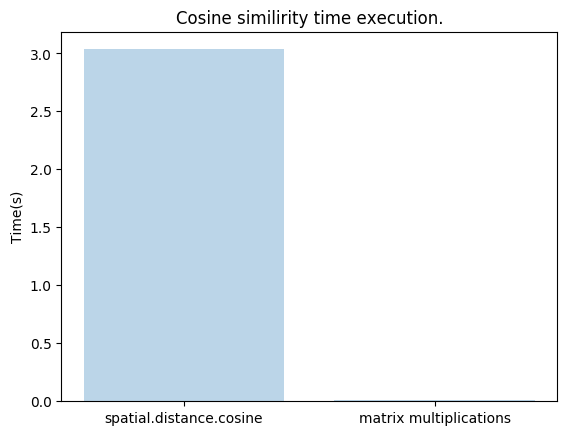

Time with spatial distance cosine is 3.035079010000004 s!
Time with matrix multiplication is 0.008578742999986844 s!
Speedup is --> 353.79064392122 !


In [0]:
plt.rcdefaults()

functions = ('spatial.distance.cosine','matrix multiplications')
y_pos = np.arange(len(functions))
performance = [time1,time2]

plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, functions)
plt.ylabel('Time(s)')
plt.title('Cosine similirity time execution.')
 
plt.show()
print("Time with spatial distance cosine is "+str(time1)+" s!")
print("Time with matrix multiplication is "+str(time2)+" s!")
print("Speedup is --> "+str((time1/time2))+" !")


Παρατηρούμε ότι η χρήση πολλαπλασιασμού πινάκων επιφέρει ραγδαία μείωση του χρόνου εκτέλεσης, μάλιστα πέρνουμε speedup περίπου ίσο με 354(!!).Το γεγονός αυτό είναι μάλλον αναμμενόμενο καθώς στον πολλαπλασιαμό πινάκων κάνουμε μόλις μία πράξη , ενώ με την χρήση της συνάρτησης εκτελούμε μία κλήση της συνάρτησης για κάθε στοιχείο.

## Σχολιασμός επιλογών βελτιστοποιήσης συστήματος συστάσεων

Αρχικά καλέσαμε την content_recommender χωρίς να πραγματοποιήσουμε κάποιο preprocessing στο carpus . Παράλληλα , δεν δώσαμε κάποιο όρισμα στον tf_idf vectorizer .

In [0]:
content_recommender(1)

Id: 1
Title: Family Troubles
Summary:
Janet feels that her parents don't love her anymore because they made her older sister the definite center of attention during her aunt's visit. Filled with anger and despair, she decides to run away. The gang volunteers to help Janet become "adapted" by another couple and choose elderly Mr. and Mrs. Jones as potential candidates. One boy overhears their plans and immediately confronts Janet's parents, who call the police. When the gang pay the Jones a visit and offer Janet to them, the Jones quickly realize that Janet is a runaway and decide to teach her and the gang a lesson. They agree to adopt her but make her life a living hell by forcing her to scrub the kitchen floor  and show where she will sleep . When Mrs. Jones decides that Janet is unhappy enough, she walks out of the kitchen to phone Janet's parents, believing that Janet will happily run to them with open arms. But once Mrs. Jones leaves, Janet  runs away again. The gang soon discover 

Με μία πρώτη ανάγνωση τον προτάσεων που μας δίνει η παραπάνω κλήση της συνάρτησης μας παρατηρούμε ότι οι ταινίες δεν ταιριάζουν ιδιαίτερα . Παρατηρώντας λίγο καλύτερα τις προτάσεις ταινιών βλέπουμε ότι οι ταινίες-προτάσεις έχουν ήρωα με το ίδιο όνομα . Πιο συγκεκριμένα , για την ταινία με id = 1 η πρωταγωνίστρια έχει όνομα Janet . Παρατηρούμε ότι οι ταινίες που μας επιστρέφονται σαν προτάσεις έχουν και αυτές πρωταγωνίστρια με όνομα Janet. Μάλιστα , η παρατήρηση αυτή δεν είναι τυχαία καθώς για την ταινία με id = 4 παρατηρούμε ότι παίρνουμε προτάσεις στις οποίες η πρωταγωνίστρια έχει όνομα Angie(παράδειγμα εκτέλεσης δίνεται παρακάτω).Ως εκ τούτου είναι ξεκάθαρη η αδυναμία του συστήματος συστάσεων μας να προτείνει ποιοτικές εναλλακτικές ταινίες .

In [0]:
content_recommender(4)

Id: 4
Title: Love with the Proper Stranger
Summary:
The film tells the story of Angie Rossini , a salesclerk at Macy's department store who finds herself pregnant after a brief affair with musician Rocky Papasano ([[Steve McQueen . When she tracks him down he doesn't remember her. She does not expect him to marry her; all she wants is enough money to pay for an abortion. Meanwhile, Angie is being pressured by her older brothers, played by Herschel Bernardi and Harvey Lembeck, to marry the unappealing cook Anthony . Rocky scrapes up money for the crude backroom abortion. But when he and Angie meet the abortionist, who turns out not to be a doctor, Rocky refuses to let her go through with the dangerous procedure. The maturity he shows in doing this brings them closer. After meeting her brothers, Rocky decides to "take his medicine" by marrying her. Angie is insulted and refuses. Angie wants a love relationship, with "bells and banjos." As an act of independence Angie moves out of the fam

**Preprocessing**

Μετά την πρώτη αποτυχία του  content recommender μας αποφασίσαμε να προχωρήσουμε σε βελτιστοποιήση τόσο του αρχικού corpus με preprocessing όσο και βελτιστοποιήση των παραμέτρων του tf_ifd Vectorizer . Στην διαδικασία του preprocessing δημιουργήσαμε μία λίστα από stopwords η οποία αποτελείται από τις αγγλικές λέξεις που περιέχει το nltk σαν stopwords (πχ η λέξη I ή η λέξη she οι οποίες δεν επιρεάζουν νοηματικά το corpus), τα αγγλικά ονόματα που περιέχει το nltk (έτσι ώστε να περιορίσουμε το φαινόμενο που περιγράψαμε παραπάνω) καθώς και μερικές custom λέξεις τις οποίες προσθέσαμε εμείς . Οι λέξεις αυτές είναι : actor,actress,film,plot,movie . Ο λόγος για τον οποίο προσθέσαμε τις συγκεκριμένες λέξεις είναι πως παρατηρήσαμε ότι το σύστημα συστάσεων μας έδινε συστάσεις με βάση τις λέξεις αυτές οι οποίες στην πραγματικότητα δεν προσδίδουν καμία πληροφορία στο corpus . Πολύ πιθανόν τόσο τα ονόματα όσο και οι πρόσθετες λέξεις που προσθέσαμε να μπορούσαν να 'κοπούν' με την χρήση των μεταβλητών min_df και max_df του tfidf vectorizer . Παρόλαυατα εμείς επιλέξαμε να τις αποκόψουμε με χρήση stopwords για μεγαλύτερη πληρότητα και καλύτερα αποτελέσματα . Επιπρόσθετα ,  χρησιμοποιώντας την συνάρτηση thorough_filter που δίνετε στο lab7 του εργαστηρίου κόψαμε και τα punctuations που προέκυψαν κατά το tokenization του corpus . Στην συνέχεια πραγματοποιήσαμε και stemming στο corpus , δηλαδή αφαιρέσαμε τις καταλήξεις από τις λέξεις έτσι νοηματικά ίδιες λέξεις αλλά με διαφορετική κατάληξη (πχ town,towns) να ταυτιστούν από το σύστημα συστάσεων . Δοκιμάσαμε και την τεχνική του της λημματοποιήσης αντί του stemming αλλά πήραμε χειρότερα αποτελέσματα και έτσι κρατήσαμε την τεχνική της αφαίρεσης κατάληξης . Παράλληλα , θεωρούμε σημαντικό να σημειώσουμε πως stemming πραγματοποιήσαμε και τα stopwords πριν τα δώσουμε στον tfidf vectorizer καθώς σύμφωνα με το documentation της συνάρτησης αυτή ότι προεπεξεργασία πραγματοποιούμε στα δεδομένα πρέπει να την πραγματοποιήσουμε και στα stopwords . Τέλος , αξίζει να σημειώσουμε ότι πριν το tokenizing μετατρέψαμε τους χαρακτήρες τοσο του corpus οσο και των stopwords σε πεζούς χαρακτήρες (lowercase).

**Παράμετροι TfidfVectorizer()**

Στην συνέχεια θα ασχοληθούμε με τις μεταβλητές του TfidfVectorizer(). Αρχικά , δώσαμε στον tokinizer την συνάρτηση thorough_filter η οποία πραγματοποιεί τόσο το κόψιμο των punctuation οσο και το stemming. Επιπρόσθετα , θέσαμε την παράμετρο lowercase True έτσι ώστε οι λέξεις του corpus να μετατραπούν σε πεζούς χαρακτήρες .Φυσικά , δώσαμε και την λίστα των stemmed stopwords που δημιουργήσαμε στην παράμετρο stopwords . Στην συνέχεια , θέσαμε την παράμετρο analyzer = word έτσι ώστε το preprocessing να γίνει ανά λέξη .Παράλληλα , θέσαμε την παράμετρο sublinear_tf = True έτσι ώστε να μετριάσουμε τη συνισφορά των λέξεων στο τελικό διάνυσμα για πολύ υψήλα term frequencies. Τέλος , θέσαμε την μεταβλητή max_df = 0.5 , δηλαδή αγνοούνται οι όροι που εμφανίζονται σε ποσοστό μεγαλύτερο του 50 % των ταινιών του corpus , και την μεταβλητή  min_df = 10 , δηλαδή αγνούνται οι όροι που εμφανίζονται σε λιγότερες από 10 ταινίες .Οι τελευταίες 2 παράμετροι που θέσαμε είναι πάρα πολύ σημαντικές για την μείωση της διαστατικότητας του corpus και φυσικά δεν επιλέχθηκαν στην τύχη . Για την παράμετρο max_df αποφασίσαμε ότι οι λέξεις που εμφανίζονται σε περίσσοτερες από τις μισές ταινίες πρόκειται μάλλον για λέξεις οι οποίες νοηματικά δεν προσδίδουν ιδιαίτερη σημασία στο corpus . Με την μεταβλητή αυτή παίξαμε κατά συν πλην 10% αλλα παρατηρήσαμε ότι μείωση της τιμής της παραμέτρου αυτής αρχίζει να επιφέρει νοηματικές αλλοιώσεις στο corpus (δηλαδή χάνεται χρήσιμη πληροφορία) και άυξηση της συνεπάγεται ότι διατειρούνται λέξεις οι οποίες δεν είναι χρήσιμες για το νοηματική ερμηνεία της κάθε ταινίας . Για την παράμετρο min_df παρατηρήσαμε ότι γενικά μπορούμε να χρησιμοποιήσουμε τιμές μεγαλύτερες του 10 αλλά σκεφτήκαμε ταινίες οι οποίες έχουν μοναδικό περιεχόμενο (και άρα είναι λίγες σε αριθμό) ίσως επιρεάστουν από την αύξηση της τιμής της παραμέτρου αυτής και έτσι κρατήσαμε την τιμή 10.

In [12]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
nltk.download('names')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
def thorough_filter(s):
    wordnet_stemmer = PorterStemmer()
    tokenized_s = nltk.word_tokenize(s.lower())
    filtered_s = []
    for word in tokenized_s:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_s.append(wordnet_stemmer.stem(word))
    return filtered_s

In [0]:
# stopwords = english stopwords + names + custom stopwords
stopwords = nltk.corpus.stopwords.words('english') + nltk.corpus.names.words() +\
    ['actor', 'actress', 'film', 'plot', 'movie']

# stopwords to lowercase
stopwords = [x.lower() for x in stopwords]

# we should perform stemming in stopwords too
stemmed_stopwords = [] 
wordnet_stemmer = PorterStemmer()
for word in stopwords:
    stemmed_stopwords += ([wordnet_stemmer.stem(w) for w in thorough_filter(word)])

In [0]:
vectorizer = TfidfVectorizer(tokenizer=thorough_filter, analyzer='word',
                             max_df=0.5, min_df=10, lowercase=True, stop_words=stemmed_stopwords, sublinear_tf=True)
%time corpus_tf_idf = vectorizer.fit_transform(corpus)

CPU times: user 50.1 s, sys: 17.5 ms, total: 50.2 s
Wall time: 50.2 s


###  15 παραδείγματα id's που επιστρέφουν καλά αποτελέσματα

#### Id = 50 , Θεματική --> Pink Panther movies 

In [0]:
content_recommender(50,7)

Id: 50
Title: Pink Elephant
Summary:
A zoo elephant breaks free of its tether and follows The Pink Panther out of the zoo. Pink orders it back, but the zoo is closed. Sympathetic to the elephant's sadness, Pink takes it home. He battles wits with his apartment manager, who is in bed trying to sleep while Pink attempts to push the elephant into various rooms and beds. Eventually the elephant finds a bed, which then collapses through several floors squashing both Pink and the apartment manager.
Categories: "Short Film",  "Comedy film",  "Animation"

Recomendation priority: 1
Id: 3661
Title: The Boy Who Owned a Melephant
Summary:
After seeing his first circus, young Johnnie  asks for an elephant to keep as a pet. To placate him, his mother  whimsically "gives" him the elephant in the local zoo. The boy's classmates resent his pride in "owning" the pachyderm, and the boy learns to share, making his peers equal "owners".
Categories: "Short Film"

Recomendation priority: 2
Id: 1551
Title: Sl

#### Id = 59 , Θεματική -->  space,spacecraft,spaceship,alien,planet

In [0]:
content_recommender(59,5)

Id: 59
Title: War of the Planets
Summary:
The film begins on New Year's Eve in the middle of the 21st century. After space station Alpha-Two reports impossible "negative radiation" readings and loses contact with United Democracies  headquarters, Captain Tice and his crew are sent to investigate. They find the Alpha-Two crew immobilized, some dead, before coming under attack themselves by green glowing energy beings. The creatures immobilize Tice's team and the space station disappears entirely. On space station Gamma-One, Commander Halstead sends ships to investigate the remaining space stations and evacuates all but a skeleton crew. Meanwhile on Earth, the creatures have possessed Captain Dubois and use him to break into the Institute for Advanced Sciences's nuclear reactor. The possessed Dubois sends the U.D. a message offering "symbiotic partnership" for "the good of the whole". As the energy beings seize each of the stations and surround the Earth, Dubois relays the demands of the

#### Id = 265 , Θεματική -->  Halloween,witches,magic

In [0]:
content_recommender(265,5)

Id: 265
Title: Return to Halloweentown
Summary:
Marnie and Dylan are going to follow their dreams to go to college, at Halloweentown University, which is also known as Witch University. Marnie is offered a full scholarship for her good deeds and for her work in the previous years. Much to her mother Gwen's dismay, Marnie goes, and her brother Dylan reluctantly forced along by Gwen to keep an eye on her. The school is not what it seems. At the school, witches and warlocks can't use magic, instead they learn about Shakespeare and old magic history. Marnie had thought she was going to learn how to use her magic and is now crestfallen. She runs into her old friend Ethan  and makes a new friend, Aneesa the genie . She also makes three new enemies in the Sinister Sisters, a triad of malevolent witches with whom Dylan is immediately infatuated. Sadly, Marnie discovers that she in fact is responsible for the restriction on the use of magic at the University. The University was originally estab

#### Id = 62 , Θεματική -->  art,painter,painting

In [0]:
content_recommender(62,5)

Id: 62
Title: Environment
Summary:
Mary Garval is forced by poverty into posing semi-nude for a painting, L'Environment. The painter's assistant, Arthur, tries to seduce her but she runs away after finding out he is married. Mary seeks refuge in the country and falls for a farmer, Jimmy. They get married but Arthur, seeking revenge, sends a Jewish friend to spy on them. He sends Jimmy a copy of the painting as a wedding present. Jimmy eventually forgives Mary and decides to destroy the painting, but discovers a lost will in the frame, which reveals Mary to be the heiress to a lost fortune.
Categories: "Silent film"

Recomendation priority: 1
Id: 4289
Title: Arts and Flowers
Summary:
Woody reads an enticing add in the newspaper that says GET YOUR PIECE OF ART HUNG IN A MUSEUM. Woody sounds interested, but his neighbor could do better. Woody first tries to paint a picture of a flower. The neighbor gets jealous and tries to paint the flower but Woody gets in front of him and paints it any

#### Id = 2438 , Θεματική --> doctor,medical,clinic

In [0]:
content_recommender(2438,5)

Id: 2438
Title: Red Beard
Summary:
The film takes place in Koishikawa, a district of Edo , in the 19th century. Young Dr. Noboru Yasumoto  is the film's protagonist. Trained in a Dutch medical school in Nagasaki, the arrogant Yasumoto aspires to the status of personal physician of the Shogunate, a position currently held by a close relative; his father is already a well-established, highly competent physician. Yasumoto believes that he should progress through the safe, and well-protected, army structure of medical education. However, for Yasumoto's post-graduate medical training, he has been assigned to a rural clinic under the guidance of Akahige , Dr. Kyojō Niide . Dr. Niide may seem like a tyrannical task master, but in reality he is a compassionate clinic director. Initially, Yasumoto is livid at his posting, believing that he has little to gain from working under Akahige. Dr. Yasumoto feels that Dr. Niide is only interested in his medical notes and soon rebels against the clinic d

#### Id = 2940 , Θεματική --> ταινίες υπερηρώων

In [0]:
content_recommender(3940,5)

Id: 3940
Title: Justice League: New Frontier
Summary:
The film  begins with an unknown entity  explaining how it has witnessed the evolution of life on Earth:  This explanation is shown being written and illustrated under the title "The Last Story" by a mysterious person who then shoots himself. The film cuts to the end of the Korean War, where United States Air Force pilot Hal Jordan  and his wingman, Kyle "Ace" Morgan (voiced by [[John Heard , are attacked by enemy pilots not yet informed of the ceasefire. Hal is shot down in the ensuing conflict, and forced to kill a North Korean soldier after ejecting to safety. The trauma of this event leads Hal to a mental ward within a hospital for about six months. Elsewhere at Gotham Observatory, the last survivor of the Green Martian race, J'onn J'onzz , is inadvertently teleported to Earth by a scientist, Dr. Saul Erdel. The shock of J'onn's appearance causes Erdel to succumb to a heart attack, though not before he apologizes for stranding t

#### Id = 250 , Θεματική -->  scientist,gang,gangster,yakuza,robots

In [0]:
content_recommender(250,5)

Id: 250
Title: Full Metal Yakuza
Summary:
Aspiring yakuza Kensuke Hagane, played by Tsuyoshi Ujiki, is killed by gang violence. His corpse winds up in the hands of a scientist who manages to keep him alive by replacing much of his body with cyborg parts. Hagane has super-human strength and the scientist even reverses his impotency by giving him robotic genitals. Kensuke then searches for those responsible to get revenge.
Categories: "Science Fiction",  "Japanese Movies",  "World cinema",  "Action/Adventure",  "Horror",  "Action"

Recomendation priority: 1
Id: 1058
Title: Akui ggot
Summary:
After many years of work, a scientist obsessed with revenge develops a flower that will do his bidding and drink human blood.Synopsis from 
Categories: "Horror"

Recomendation priority: 2
Id: 4835
Title: The Monster and the Girl
Summary:
A gangster named Scot Webster  attempts to save his sister, Susan  from the clutches of rival gangster W.S Bruhl . When one of Bruhl's gang members catches Scot in B

#### Id = 275 , Θεματική -->  script,writing,writer,book

In [0]:
content_recommender(275,5)

Id: 275
Title: Adaptation
Summary:
The self-loathing Charlie Kaufman is hired to write the screenplay for The Orchid Thief. Kaufman is going through melancholic depression and is not happy that his twin brother Donald has moved into his house and is mooching off him. Donald decides to become a screenwriter like Charlie and attends Robert McKee's famous seminars. Charlie Kaufman, who rejects simplistic formulaic script writing, wants to ensure that his script is a faithful adaptation of The Orchid Thief. However, he comes to realize that the book does not have a usable narrative and that it is impossible to turn into a film, leaving him with a serious case of writer's block. Meanwhile, Donald's spec script for a clichéd psychological thriller, called The 3, sells for six or seven figures. Kaufman accidentally starts writing his script with self-reference. Already well over his deadline with Columbia Pictures, he visits Orlean in New York for advice on the screenplay. Unable to face her,

#### Id = 285 , Θεματική -->  nurse,hospital,ghosts

In [0]:
content_recommender(285,5)

Id: 285
Title: Krasue Valentine
Summary:
Sao is a nurse who comes to work at an older, rundown hospital in Bangkok. Witnessing her arrival is Num, a disabled orderly. Num is shy, but a little girl selling roses convinces him to buy one. He gives her money and the girl in turn gives the rose to Sao, forming a bond between the two. Sao takes room in an old house behind the hospital, near a disused gymnasium and the old morgue. She is getting over a breakup with an old boyfriend who left her because she turns into a ghost. And, indeed, unbeknownst to her, she does turn into the krasue ghost that very night, scaring the hospital's security guard.
Categories: "Horror",  "Comedy"

Recomendation priority: 1
Id: 4272
Title: Visible Secret
Summary:
Peter, a hairdresser, meets June, a hospital nurse, at the discothèque one night and she becomes his girlfriend. She claims to have a spiritual "third eye" which allows her to see ghosts. Peter and June develop a close bond, but Peter begins to encou

#### Id = 501 , Θεματική -->  relationship,parent,love,friend,daughter

In [0]:
content_recommender(501,5)

Id: 501
Title: Fair Love
Summary:
Hyung-min is single man in his mid-50s who runs a camera shop. He promises with his former friend Ki-yeok to care for his daughter Nam-eun. Hyung-min knew Nam-eun as a little girl and Ki-yeok stealing money from Hyung-min. The relationship between them turned to love when Nam-eun called Hyung-min "oppa" and he found himself falling in love with her.
Categories: "Romance Film",  "Drama"

Recomendation priority: 1
Id: 3038
Title: Cinnamon
Summary:
When the single parent owner of Cinnamon, a Maltese puppy, falls for a single parent architect, the dog tries to break up the relationship, succeeds, realizes the unhappiness that results, and then tries to reunite the couplehttp://battleshippretension.com/?p9222.
Categories: "Family Film"

Recomendation priority: 2
Id: 125
Title: Stamp Day for Superman
Summary:
When Lois and Clark come upon a robbery while shopping, Superman apprehends the burglar, who claims to have to steal because he never bothered to save 

#### Id = 58 , Θεματική -->  soviet,world-war

In [0]:
content_recommender(58,5)

Id: 58
Title: Don't Fool Me
Summary:
Two friends, Hero Hwa  and Chiang Ho-Chie  star are two old friends who meet up in later life. Hwa is a triad gang member and Ho-Chie is an insurance salesman, Hero is looking for a career change and Ho-Chie has become disillusioned with life after discovering he has a "bubble" in his brain that could burst at any time killing him. The two decide to switch lives for a bit with the Triad going respectable and the Insurance Salesman taking on the world of the Triads. As well as a new life, both of the two friends find new love.
Categories: "Chinese Movies"

Recomendation priority: 1
Id: 815
Title: Beautiful Girls
Summary:
Willie Conway goes home for his high school class reunion. He is at a crossroads in his life. He can't decide if he should marry his girlfriend. He can't decide if he should quit his music and take a job as a salesman. Over the course of the film, he spends time with his old friends who are all at similar crossroads. By the end they 

#### Id = 66 , Θεματική -->  robbers,robbery,bank ,jail,fbi,police

In [0]:
content_recommender(66,5)

Id: 66
Title: The Town
Summary:
 Four lifelong friends from the Boston neighborhood of Charlestown—Doug MacRay, James "Jem" Coughlin, Albert "Gloansy" Magloan, and Desmond "Dez" Elden —rob a bank. They take the manager, Claire Keesey, hostage but release her without harm. Doug follows Claire to prevent Jem from eliminating her as a witness, but a romance grows between them which he hides from the gang. As they grow closer, Doug tells Claire of his search for his long-lost mother, and how he imagined she went to live with his aunt in Florida. He also blew a chance to be a professional hockey player for a life of crime. She tells Doug about seeing a tattoo on one of the robbers, and he realizes she can identify Jem and send them all to jail. He knows that Jem will kill her if he realizes the truth, and he persuades her that the authorities cannot protect her either so she decides not to tell the police. But Doug is increasingly disenchanted with his criminal lifestyle and the lies he has

#### Id = 4103 , Θεματική -->  ταινίες φαντασίες-δράσης

In [0]:
content_recommender(4103,5)

Id: 4103
Title: Indiana Jones and the Kingdom of the Crystal Skull
Summary:
In 1957, World War II veteran Indiana Jones and his partner George "Mac" McHale are kidnapped by a group of Soviet agents led by Colonel Dr. Irina Spalko. The Soviets infiltrate a warehouse labeled "Warehouse 51" in Nevada and force Jones to find a crate containing the remains of an extraterrestrial that crashed ten years earlier near Roswell, New Mexico. After finding the crate, with its highly magnetic contents, Mac, bribed by the Soviets, double-crosses Jones. After a running battle with the Soviets, Indiana manages to escape on a rocket sled into the desert; he stumbles into a deserted town, part of a nuclear test site and survives a nuclear detonation by hiding in a lead-lined refrigerator. He is later debriefed by the Federal Bureau of Investigation, who believe he's also working for the Soviets. Shortly after returning to Marshall College, Jones is offered an indefinite leave of absence to avoid being fi

#### Id = 2999 , Θεματική -->  Japanese,Chinese movies

In [0]:
content_recommender(2999,5)

Id: 2999
Title: Naval Commandos
Summary:
The Chinese Navy led by its captain  is attempting to defend its coastline from a Japanese attack, they send their commando unit led by Szu Shih into the mainland to enlist help to thwart the Japanese before they attack. Japanese officers have been hanging out in a place owned by David Chiang and his hot-headed body guard Fu Sheng but they are secretly opposed to the Japanese. The commandos enlist the help of Chiang and Sheng to kill the Japanese officers led by Shan Mao and destroy their attacking ships.
Categories: "Martial Arts Film",  "Chinese Movies"

Recomendation priority: 1
Id: 921
Title: New Fist of Fury
Summary:
A brother and sister escape from Japanese-occupied Shanghai to Japanese-occupied Taiwan, to stay with their grandfather who runs a Kung-Fu school there. However, the master of a Japanese Kung- Fu school in Taiwan has designs on bringing all other schools on the island under his domination, and part of his plan involves the murd

#### Id = 15 , Θεματική -->  police,crime,money

In [0]:
content_recommender(15,5)

Id: 15
Title: The Business Man
Summary:
At a time when Mumbai Police, headed by Police Commissioner , announce that the much dreaded Mafia Raj is completely wiped out in the city, and there are no under world Bhai’s in Mumbai, a rookie named Surya  lands in the country’s commercial capital with an intention to become a Mafia Don. His friend, Brahmaji receives him and brings him to Dharavi. He offers him shelter and tells him that he would soon fetch him a job so that he can settle down in life. But Surya wants to carve an identity for himself, by reorganizing Mumbai's Mafia Raj and eventually rule Mumbai. He then mocks as a cop and gets his first bounty and then he forms a gang of his own. Surya meets up with a local politician Laalu  who is in trouble and offers him help. Surya begins recruiting criminals and gangsters in Mumbai and starts to extort people for money. He slowly gains momentum and in the process becomes popular and feared among the people. Meanwhile, he also knowingly t

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
from sklearn.externals import joblib  
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα. Προσοχή: αυτό ισχύει μόνο στα Azure και Kaggle, στο Colab και στο IBM τα αρχεία εξαφανίζονται όταν ανακυκλώνεται ο πυρήνας και θα πρέπει να τα αποθηκεύετε τοπικά. Περισσότερα στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing).

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [0]:
from sklearn.externals import joblib
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 
joblib.dump(som, 'som.pkl')

['som.pkl']

In [0]:
from google.colab import files
files.download('corpus_tf_idf.pkl')
files.download('som.pkl')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 53468, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving som.pkl to som (1).pkl
Saving corpus_tf_idf.pkl to corpus_tf_idf (1).pkl
User uploaded file "som.pkl" with length 26293504 bytes
User uploaded file "corpus_tf_idf.pkl" with length 5532627 bytes


In [19]:
from sklearn.externals import joblib

corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')
som = joblib.load('som.pkl')

ValueError: ignored

In [0]:
!ls -lh

total 133M
-rw-r--r-- 1 root root 5.3M Jan 17 01:40 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Jan  8 17:15 sample_data
-rw-r--r-- 1 root root 128M Jan 17 01:40 som.pkl


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [0]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

Σημειώστε ότι το IBM Watson δείνει "Kernel dead" εάν δεν έχετε βελτιστοποιήσει το tfidf και μικρύνει τις διαστάσεις του dataset (πιθανότατα κάποια υπέρβαση μνήμης).

In [0]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [0]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [15]:
final_set.shape

(5000, 5647)

Με βάση την εμπειρία σας στην προετοιμασί των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [4]:
# install somoclu
!pip3 install --upgrade --user somoclu
# import somoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Requirement already up-to-date: somoclu in /root/.local/lib/python3.6/site-packages (1.7.5)


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


In [0]:
n_rows, n_columns = 30, 30
som = somoclu.Somoclu(n_columns, n_rows, std_coeff=1)
%time som.train(data=final_set, epochs=100, radiuscooling='exponential', scalecooling='exponential')

CPU times: user 2h 3min 38s, sys: 9.23 s, total: 2h 3min 47s
Wall time: 1h 2min 58s


In [0]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

In [0]:
print(bmus)
print(indices)

[[17 22]
 [25  6]
 [26 25]
 ...
 [10  7]
 [18 12]
 [ 0 17]]
[424 616 651 ... 252 441  15]



## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [0]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=60)
som.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



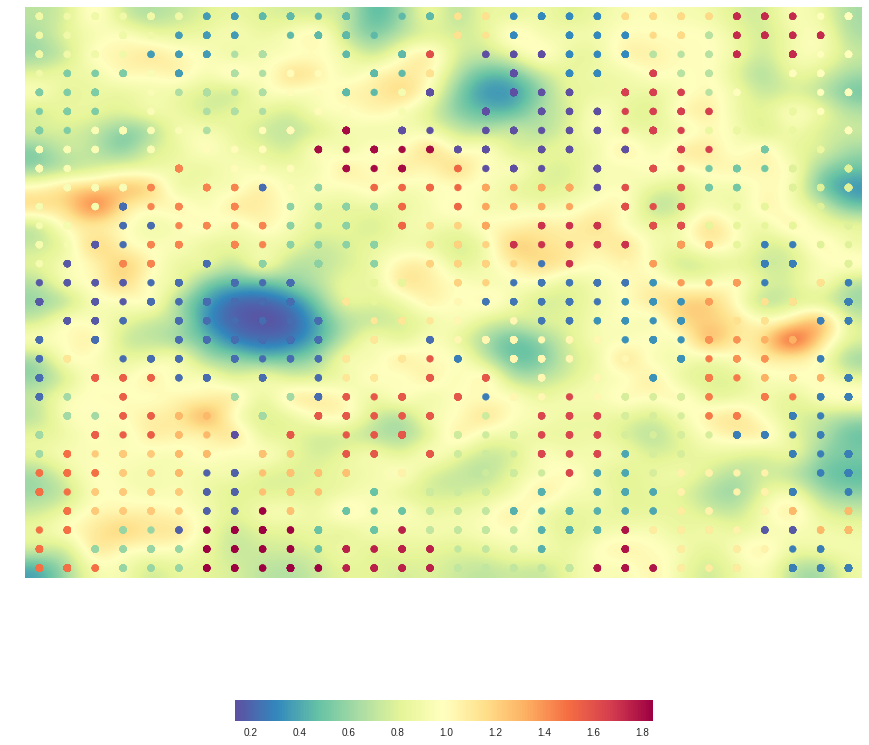

[[26 26 26 26 26 26  8  8 11 11 11 11 11 11 11 35 35  6  6  6  6 36 36 36
  36 55 55 55 29 29]
 [26 26 26 26 26  8  8  8 18 11 11 11 11 11 11 35 35  6  6  6  6  6 36 36
  19 55 55 55 55 29]
 [26 26 26 26  8  8  8 18 18 18 11 11 11 11 51 35  0  0  0  6  6  6 19 19
  19 55 55 55 29 29]
 [26 14 14 14 28  8 18 18 18 30 30 11 11 11 35  0  0  0  0  6  6 53 53 19
  19 29 29 29 29 29]
 [14 14 14 14 28 18 18 18 18 30 30 11 11 27  0  0  0  0  0  0 53 53 53 53
  19 29 29 29 29 29]
 [14 14 14 28 28 28 18 18 18 30 30 30 27 27  0  0  0  0  0  0  0 53 53 53
  53 25 25 25 29 29]
 [14 14 28 28 28 28 18 30 30 30 30 58 58  0  0  0  0  0  0  0  0 53 53 53
  25 25 25 25 25 29]
 [28 28 28 28 28 45 30 30 30 30 58 58 58 58 58  0  0  0  0  0  0  0 53 53
  53 13 13 25 25 23]
 [28 28 28 28  3 45 45 30 30 30 30 58 58 58 48 48  0  0  0  0  0  0 51 51
  13 13 13 23 23 23]
 [28 28 28 28 45 45 45 45  3 30 15 15 48 48 48 48 42 42 42 42  0 51 51 51
  13 13 13 23 23 23]
 [27 27 27  3 45 45 45 45 45 15 15 15 15 48 48 48 

In [0]:
som.view_umatrix(bestmatches=True,labels=None,colorbar=True,figsize=(15, 15))

# clusters is a list of lists of neurons
clusters = som.clusters
print(clusters) 

# clusters is an array of arrays
s = clusters[0]
# let's transform clusters into a single array
for i in range(1,len(clusters)):
    s = np.concatenate((s, clusters[i]), axis=0) 
cl , clind= np.unique(s,return_counts=True,axis = 0)

# sort clusters by increasing number of neurons
clind2 = clind.argsort()
clind = clind[clind2]
cl = cl[clind2]

# print clusters and their number of neurons
print()
print("Clusters sorted by increasing number of neurons : ")
print("Cluster index :")
print(cl)
print("Number of neurons :")
print(clind)

In [0]:
def print_categories_stats(id_list,cluster_id):
    total = []
    
    for i in id_list:
        t = categories[i][0]
        # split string on commas and strip whitespaces from start and end of each string
        t = [x.strip() for x in t.split(',')]
        # transform each category from (example) '"Indie"' to 'Indie'
        t = [eval(tag) for tag in t]
        # add categories to total list of categories
        total.extend(t)
    
    # np.unique will return categories,number of times each category has been seen
    t1 ,counts = np.unique(total,return_counts = True,axis = 0)
    # we will use counts2 in order to sort t1
    counts2 = (-counts).argsort()
    # sort no of counts in descending order
    #counts = np.sort(counts)
    counts = counts[counts2]
    # sort categories using counts sorted
    t1 = t1[counts2]
    # print results 
    result = zip(t1,counts)
    print("Overall Cluster "+str(cluster_id)+" Genres stats:  ")
    print(list(result))
    print("Number of movies: {}".format(len(id_list)))
    print()

In [0]:
def neuron_movies_report(neurons, cluster_id):
    # at first get the identifiers of the movies
    movies = np.array([], int)
    for neuron in neurons:
      movies = np.hstack((movies,np.where(indices == neuron)[0]))
    # then print statistics
    print_categories_stats(movies, cluster_id)

In [0]:
def print_cluster_neurons_movies_report(cluster):
    
    neurons = []
    # returns an array of [x y] where x y are neurons coordinates
    bm_ar = np.column_stack(np.where(clusters==cluster))
    # print(bm_ar)
    # we want to find which neurons of the cluster are parts of ubmus
    for i in range(len(bm_ar)):
        for j in range(len(ubmus)):
            # ubmus x is bm_arr y and ubmus y is bm_arr x
            if(bm_ar[i][0] == ubmus[j][1] and bm_ar[i][1] == ubmus[j][0]):
            # if(np.array_equal((np.roll(ubmus[j],1,0),bm_arr[i]))) -- defteros tropos    
                # append movie id
                neurons.append(j)
    neuron_movies_report(neurons, cluster)

In [0]:
# get categories statitistics for each cluster
for i in range(0,60):
    print_cluster_neurons_movies_report(i)

Overall Cluster 0 Genres stats:  
[('Comedy', 264), ('Musical', 28), ('Slapstick', 19), ('Screwball comedy', 13), ('Black comedy', 13), ('World cinema', 11), ('Buddy film', 11), ('Crime Fiction', 10), ('Science Fiction', 9), ('Satire', 9), ('Teen', 9), ('Sports', 8), ('Comedy of Errors', 7), ('Cult', 7), ('Adventure', 6), ('Action', 6), ('Comedy-drama', 6), ('Sex comedy', 6), ('Crime Comedy', 6), ('Western', 5), ('Media Satire', 5), ('Japanese Movies', 5), ('Gross-out film', 5), ('Workplace Comedy', 5), ('Fantasy', 5), ('Absurdism', 5), ('Gross out', 5), ('Adventure Comedy', 4), ('Musical comedy', 4), ('Animation', 3), ('Chinese Movies', 3), ('Coming of age', 3), ('Holiday Film', 3), ("Children's/Family", 3), ('Thriller', 3), ('Music', 3), ('Fantasy Comedy', 3), ('Family Film', 3), ('Ensemble Film', 3), ('Stoner film', 2), ('Animal Picture', 2), ('Short Film', 2), ('Action/Adventure', 2), ("Children's", 2), ('Romantic drama', 2), ('Mystery', 2), ('War film', 2), ('Ealing Comedies', 2),

###  Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.



# Τελική παράδοση άσκησης

- Θα παραδώσετε στο mycourses το παρόν notebook επεξεργασμένο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Προσέξτε ώστε να **απαντήσετε σε όλα τα σημεία όπου απαιτείται**.
- Μαζί Θα παραδώσετε τα joblib dumps των τελικών `corpus_tf_idf.pkl` και `som.pkl` (μεγάλος χάρτης - 5000 ταινίες) που θα χρησιμοποιήσετε. Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στο dump του χάρτη που θα μας παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. Οδηγίες για την αποθήκευση των dumps θα βρείτε στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing). 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **4 αρχεία (το .ipynb και το .py του notebook καθώς και τα δύο .pkl)**
- **Το maximum upload filesize στο mycourses είναι 29MB**, εάν το zip σας είναι μεγαλύτερο, δεν έχετε βελτιστοποιήσει το tfidf.

<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">ΞΑΝΑ: Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>


## Ημερομηνία παράδοσης ##

Πέμπτη 17 Ιανουαρίου 2019 αυστηρά (παρακαλούμε όχι αιτήματα για παράταση).

Καλή επιτυχία!
